<a href="https://colab.research.google.com/github/cathmarkert/Intro-dc/blob/main/praticas/Lista_de_Exercicio_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista de Exercício 7
### Processamento Digital de Imagens (SEL0449/SEL5895)

**Instruções:**

 1. Esta lista consiste em 6 exercícios.
 1. Deve-se colocar comentários nos códigos desenvolvidos.
 1. As perguntas devem ser respondidas também como comentários no arquivo.
 1. Colocar seu nome e número USP abaixo.
 1. Quaisquer problemas na execução das listas, entrar em contato com os monitores.
 1. Depois de terminado os exercícios, deve ser gerado um arquivo **extensão .ipynb** para ser enviado ao professor pelo E-DISCIPLINAS da disciplina até a data máxima de entrega.
 1. Caso não seja enviado, o aluno ficará sem nota.


---



 <table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/LAVI-USP/SEL0449-SEL5895_2025/blob/main/praticas/Lista_de_Exercicio_7.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Executar no Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/LAVI-USP/SEL0449-SEL5895_2025/blob/main/praticas/Lista_de_Exercicio_7.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Ver codigo fonte no GitHub</a>
  </td>
</table>


`Nome: Catherine Bezerra Markert`

`Número USP: 16995661`

### Introdução:

Vamos importar as bibliotecas que utilizaremos durante essa prática!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from skimage.restoration import estimate_sigma
from scipy.io import loadmat
# Ensure required libraries are installed
try:
    import bm3d
except ImportError:
    import sys
    !{sys.executable} -m pip install bm3d
    import bm3d

try:
    import pywt
except ImportError:
    !{sys.executable} -m pip install PyWavelets
    import pywt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 862.0/862.0 kB 9.4 MB/s eta 0:00:00


#### **Atenção**: os códigos abaixo são para fazer o download das imagens (EXECUTE-OS). Os mesmos não fazem parte dessa prática.

In [2]:
import urllib.request
try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2025/raw/refs/heads/main/imagens/pratica_07/img_degrau.tif", "img_degrau.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")
try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2025/raw/refs/heads/main/imagens/pratica_07/casa_ruidosa.png", "casa_ruidosa.png")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")
try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2025/raw/refs/heads/main/imagens/pratica_07/casaOriginal.png", "casaOriginal.png")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")
try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2025/raw/refs/heads/main/imagens/pratica_07/cameraman_ruidosa.png", "cameraman_ruidosa.png")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")
try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2025/raw/refs/heads/main/imagens/pratica_07/cameraman.png", "cameraman.png")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")
try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2025/raw/refs/heads/main/imagens/pratica_07/H.mat", "H.mat")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")
try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2025/raw/refs/heads/main/imagens/pratica_07/atleta.tif", "atleta.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

### 1) Análise do ruído não dependente do sinal (1.5/10.0)

Nesta prática, iremos trabalhar um tipo de degração conhecida como ruído. De início, discutiremos sobre um ruído não dependende do sinal. Um dos exemplos desta categoria é o ruído Gaussiano.

<center><img src="https://github.com/LAVI-USP/SEL0449-SEL5895_2025/raw/refs/heads/main/imagens/pratica_07/ruidoGaussiano.gif" style="width:836px;height:266px;" width="980" height="300"></center>

<center><caption><b> Figura 1:</b> Imgens degradadas com diferentes níveis de ruído Gaussiano.</b></caption></center>

As principais fontes de ruídos gaussianos em imagens digitais estão relacionados ao ruído térmico durante a aquisição. Em processamento de imagens digitais, o ruído gaussiano pode ser reduzido utilizando-se técnicas de filtros espaciais, que suavizam os ruídos contidos na imagem, com a desvantagem de borrá-la.

1.1) Para analisar as características dessa degradação, vamos utilizar uma imagem degrau com diferentes níveis de cinza. Siga os passos abaixo:

1. Carregue a imagem ` img_degrau.tif`.
2. Agora vamos inserir ruído na imagem com desvio padrão = 10. Para isso vamos usar uma função de nome ``` InsertNoiseAWGN``` . Já disponibilizamos o escopo da função e uma descrição das entradas e saídas.
3. Mostre, lado a lado, a imagem original, a imagem degradada (ruidosa)  e a imagem contendo somente o ruído Gaussiano (que fora adicionado à imagem original no exercício anterior).

   *   Dica:  Fazendo a subtração da imagem ruidosa pela imagem original, o que sobra é somente o ruído que foi adicionado.
   
4. Calcule a média e variância **sobre cada degrau de cinza** na imagem ruidosa e em seguida plote o gráfico de Média (Eixo X) e Variância (Eixo Y).
5. Comente sobre o comportamento da variância em relação à média.


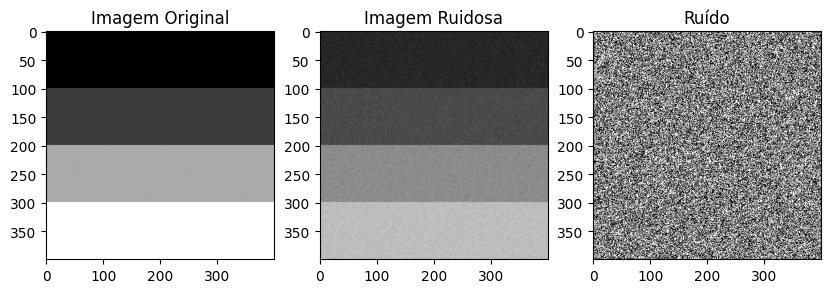

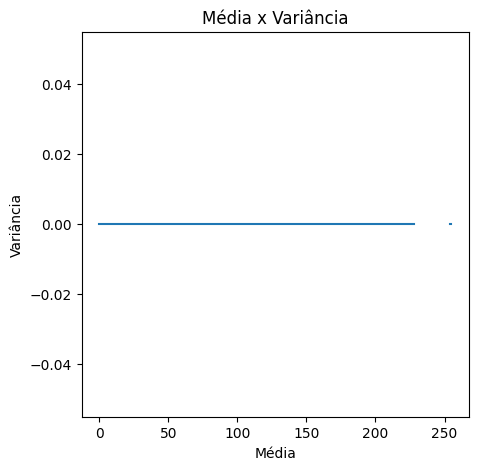

In [11]:
def InsertNoiseAWGN(img, stdNoise):
  '''
  Entrada:
    - img: Imagem de entrada (uint8).
    - stdNoise: Desvio padrão do ruído.

  Saída:
    - imgNoisy: Imagem com ruído AWGN .
  '''
  nRows, nCols = img.shape
  noise =  stdNoise * np.random.normal(size=(nRows,nCols)).astype(float)
  imgNoisy = img + noise
  imgNoisy = imgNoisy.astype('uint8')
  return imgNoisy

## -- Seu código começa AQUI -- ##
#Carregando a imagem
img1 = cv.imread('img_degrau.tif', cv.IMREAD_UNCHANGED)

#Adicionando ruído à imagem
img1_n = InsertNoiseAWGN(img1, 10)

#Gerando a imagem do ruído
noise1 = img1_n - img1

#Plotando as 3 imagens lado a lado
plt.figure(figsize=(10,10))
plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title('Imagem Original')
plt.subplot(1, 3, 2)
plt.imshow(img1_n, cmap='gray')
plt.title('Imagem Ruidosa')
plt.subplot(1, 3, 3)
plt.imshow(noise1, cmap='gray')
plt.title('Ruído')
plt.show()

#Calculando média e variância de cada degrau de cinza
media = []
variancia = []

for i in range(256):
  media.append(np.mean(img1_n[img1_n == i]))
  variancia.append(np.var(img1_n[img1_n == i]))

#Plotando o gráfico de média x variância
plt.figure(figsize=(5,5))
plt.plot(media, variancia)
plt.title('Média x Variância')
plt.xlabel('Média')
plt.ylabel('Variância')
plt.show()


## -- Seu código termina AQUI -- ##

## Comentários:

# Comentário:

### 2) Filtragem do Ruído Não Dependente do Sinal (1.5/10.0)

Agora, vamos aprender como filtrar uma imagem degradada com ruído Gaussiano independente do sinal.

1. Carregue e exiba a imagem `casa_ruidosa.png`.

Como podemos observar, a imagem carregada já está ruidosa. Portanto, nossa missão é filtrá-la para melhorar sua qualidade. Para isso, utilizaremos a função `bm3d.bm3d`, disponível nas bibliotecas carregadas. Essa função possui alguns parâmetros de entrada:

```python
ImgFiltrada = (bm3d.bm3d(ImgRuidosa / 255, sigma / 255)) * 255
```

- **`ImgRuidosa / 255`**:
  - Representa a imagem ruidosa que será processada pelo BM3D.
  - A normalização dividindo por 255 garante que os valores da imagem estejam entre 0 e 1, um requisito do BM3D.

- **`sigma / 255`**:
  - `sigma` é o desvio padrão do ruído presente na imagem ruidosa.
  - A divisão por 255 é necessária para manter a escala do ruído compatível com a imagem normalizada.

- **Multiplicação por 255**:
  - Após a filtragem, o BM3D retorna uma imagem com valores normalizados entre 0 e 1.
  - Para restaurar a escala original de intensidade dos pixels (0 a 255), multiplicamos o resultado por 255.

2. Agora, precisamos definir um valor adequado para o parâmetro `sigma` na função BM3D. Como a imagem foi corrompida por ruído Gaussiano de desvio padrão desconhecido, aplique a filtragem para diferentes valores de sigma:
  - 6
  - 8
  - 10
  - 12
  - 14
  - 16

Após a filtragem para esses diferentes valores de sigma, utilizaremos uma métrica para avaliar o quão próxima a imagem filtrada está da original. Uma métrica amplamente utilizada para medir a qualidade da filtragem em processamento de imagens é o **MSE** (*Mean Squared Error*). Essa métrica mede o erro médio ao quadrado entre os pixels das duas imagens (original e filtrada). Para nossa análise, **quanto menor o MSE, melhor a qualidade da filtragem**. O escopo da função MSE, junto com a descrição das entradas e saídas, já foi disponibilizado. O MSE é calculado pela seguinte equação:

$$ MSE = média \left( \left(Img_{Sem ruído} - Img_{Filtrada} \right)^{2} \right) $$

3. Como essa métrica necessita de uma referência livre de ruído (*ground truth*), carregue a imagem `casaOriginal.png`.
4. Calcule os valores de MSE das imagens filtradas para cada valor de sigma utilizado no item 2 e plote um gráfico onde:
   - O eixo X representa os valores de sigma utilizado e;
   - O eixo Y representa os valores de MSE para cada imagem filtrada.

5. Mostre, lado a lado, as seguintes imagens:
   - A imagem original sem ruído.
   - A imagem ruidosa.
   - A imagem filtrada que apresentou o melhor resultado segundo a métrica MSE.

6. Comente os resultados obtidos analisando as imagens mostradas.


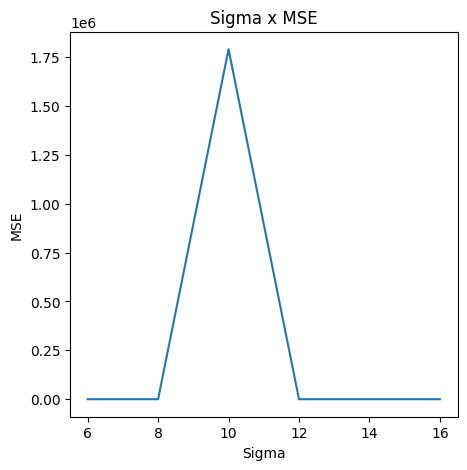

In [14]:
def ComputeMSE(Img1, Img2):
    '''
    Entrada:
    - Img1: Imagem original.
    - Img2: Imagem que se deseja analisar.

    Saída:
    - Valor de MSE.
    '''

    MSE = np.mean((Img1 - Img2) ** 2)

    return MSE


## -- Seu código começa AQUI -- ##
#Carregando a imagem com ruído
img2 = cv.imread('casa_ruidosa.png', cv.IMREAD_UNCHANGED)

#Filtrando as imagens com os diferentes sigmas
img2_6 = (bm3d.bm3d(img2 / 255, 6 / 255)) * 255
img2_8 = (bm3d.bm3d(img2 / 255, 8 / 255)) * 255
img2_10 = (bm3d.bm3d(img2 / 25, 10 / 255)) * 255
img2_12 = (bm3d.bm3d(img2 / 255, 12 / 255)) * 255
img2_14 = (bm3d.bm3d(img2 / 255, 14 / 255)) * 255
img2_16 = (bm3d.bm3d(img2 / 255, 16 / 255)) * 255

#Carregando a imagem original, sem ruído, para o ground truth
img3 = cv.imread('casaOriginal.png', cv.IMREAD_UNCHANGED)

#Calculando os valores de MSE para cada imagem
mse_6 = ComputeMSE(img3, img2_6)
mse_8 = ComputeMSE(img3, img2_8)
mse_10 = ComputeMSE(img3, img2_10)
mse_12 = ComputeMSE(img3, img2_12)
mse_14 = ComputeMSE(img3, img2_14)
mse_16 = ComputeMSE(img3, img2_16)

#Gerando o gráfico de sigma x mse
plt.figure(figsize=(5,5))
plt.plot([6, 8, 10, 12, 14, 16], [mse_6, mse_8, mse_10, mse_12, mse_14, mse_16])
plt.title('Sigma x MSE')
plt.xlabel('Sigma')
plt.ylabel('MSE')
plt.show()

## -- Seu código termina AQUI -- ##

## Comentários:

In [15]:
#Printando todos os mses
print('MSE 6: ', mse_6)
print('MSE 8: ', mse_8)
print('MSE 10: ', mse_10)
print('MSE 12: ', mse_12)
print('MSE 14: ', mse_14)
print('MSE 16: ', mse_16)

#O mais baixo é o de 12

MSE 6:  48.384967416378956
MSE 8:  18.85718109293104
MSE 10:  1790133.457453743
MSE 12:  16.119347830269977
MSE 14:  17.716393554669484
MSE 16:  19.12220952467933


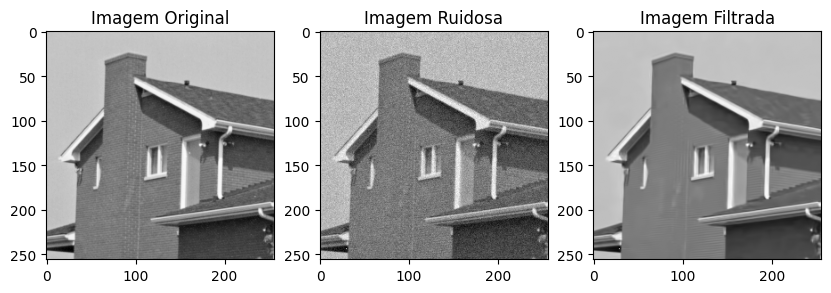

In [16]:
#Plotando a imagem original, a ruidosa e a com melhor métrica de filtro

plt.figure(figsize=(10,10))
plt.subplot(1, 3, 1)
plt.imshow(img3, cmap='gray')
plt.title('Imagem Original')
plt.subplot(1, 3, 2)
plt.imshow(img2, cmap='gray')
plt.title('Imagem Ruidosa')
plt.subplot(1, 3, 3)
plt.imshow(img2_12, cmap='gray')
plt.title('Imagem Filtrada')
plt.show()

# Comentários:

### 3) Análise do Ruído dependente do sinal (Poisson) (1.5/10.0)

Agora vamos trabalhar com um tipo de ruído que possui dependência com sinal: o ruído Poisson.

<center><img src="https://github.com/LAVI-USP/SEL0449-SEL5895_2025/raw/refs/heads/main/imagens/pratica_07/RuidoPoisson.gif" style="width:836px;height:266px;" width="980" height="300"></center>

<center><caption><b> Figura 1:</b> Imgens degradadas com diferentes níveis de ruído Poisson.</b></caption></center>

Esse ruído é comumente encontrado em dispositivos que se valem da contagem de fótons para a aquisição de imagem, como por exemplo exames de raios X (mamografia, tomografia, fluoroscopia e etc). De forma geral, quanto mais fótons contados pelos detectores, maior será o valor de intensidade do pixel. Contudo, devido à variação no número de fótons detectados, o valor de um pixel é influenciado por uma degradação cuja variância é proporcional à intensidade de luz captada por aquele pixel.
Para entendermos melhor esse tipo de ruído, siga as instruções abaixo:

1. Insira ruído Poisson na ` img_degrau.tif` . Para isso vamos usar uma função de nome ```InsertNoisePoisson```. Já disponibilizamos o escopo da função e uma descrição das entradas e saídas.
2. Mostre, lado a lado, a imagem original, a degradada e a máscara de ruído, ou seja, a imagem contendo somente o ruído Poisson.
   *   Dica:  Fazendo a subtração da imagem ruidosa pela imagem original, o que sobra é somente o ruído que foi adicionado.
3. Calcule a média e variância sobre cada degrau de cinza para a imagem ruidosa. Em seguida plote o gráfico de Média (Eixo X) e Variância (Eixo Y).
4. Comente sobre o comportamento da variância em relação à média. Faça um comparativo em relação ao exercício 1.1 .

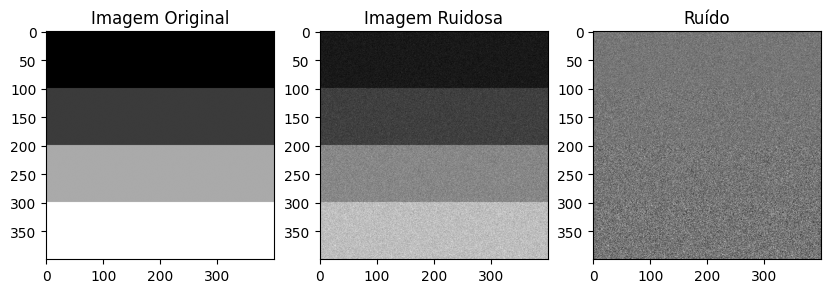

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:4008: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


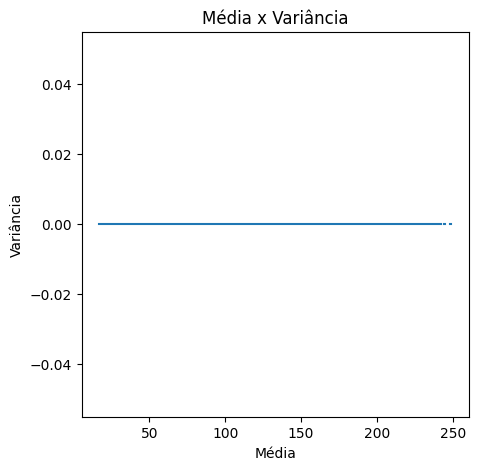

In [17]:
def InsertNoisePoisson(img):
    '''
    Entrada:
      - img: Imagem de entrada (uint8).
    Saída:
      - imgNoisy: Imagem com ruído Poisson.
    '''

    img = img.astype(np.float32)  # Garantir precisão numérica
    imgNoisy = np.random.poisson(img)  # Gerar ruído Poisson puro
    imgNoisy = np.clip(imgNoisy, 0, 255)
    return imgNoisy

## -- Seu código começa AQUI -- ##

img4 = cv.imread('img_degrau.tif', cv.IMREAD_UNCHANGED)

#Adicionando ruído à imagem
img4_n = InsertNoisePoisson(img4)

#Gerando a imagem do ruído
noise2 = img4_n - img4

#Plotando as 3 imagens lado a lado
plt.figure(figsize=(10,10))
plt.subplot(1, 3, 1)
plt.imshow(img4, cmap='gray')
plt.title('Imagem Original')
plt.subplot(1, 3, 2)
plt.imshow(img4_n, cmap='gray')
plt.title('Imagem Ruidosa')
plt.subplot(1, 3, 3)
plt.imshow(noise2, cmap='gray')
plt.title('Ruído')
plt.show()

#Calculando média e variância de cada degrau de cinza
media = []
variancia = []

for i in range(256):
  media.append(np.mean(img4_n[img4_n == i]))
  variancia.append(np.var(img4_n[img4_n == i]))

#Plotando o gráfico de média x variância
plt.figure(figsize=(5,5))
plt.plot(media, variancia)
plt.title('Média x Variância')
plt.xlabel('Média')
plt.ylabel('Variância')
plt.show()

## -- Seu código termina AQUI -- ##

## Comentários:

# Comentário:

### 4) Filtragem do Ruído Dependente do Sinal (Poisson) (1.5/10.0)

Utilizando a função ```bm3d.bm3d```, vamos repetir o procedimento realizado na questão 2, agora aplicando a filtragem a uma imagem degradada por ruído Poisson.

1. Carregue a imagem degradada por ruído Poisson `cameraman_ruidosa.png`.

2. Realize a filtragem da imagem utilizando o BM3D para diferentes valores de sigma:
  - 6
  - 8
  - 10
  - 12
  - 14
  - 16

Agora, utilizaremos novamente a métrica clássica para avaliar a qualidade da imagem após a filtragem: o **MSE** (*Mean Squared Error*). Lembre-se: **Quanto menor o valor do MSE, melhor a qualidade da filtragem.**

3. Como essa métrica requer uma imagem de referência (*ground truth*), carregue a imagem original livre de ruído `cameraman.png`. Em seguida, calcule os valores de MSE para todos os valores de sigma utilizados no item 2 na filtragem e plote um gráfico onde:
   - O eixo X representa os valores de sigma.
   - O eixo Y representa os valores de MSE.

4. Mostre, lado a lado, as seguintes imagens:
   - A imagem original sem ruído.
   - A imagem ruidosa.
   - A imagem filtrada que apresentou o melhor resultado segundo a métrica MSE.

5. Comente os resultados obtidos em relação as imagens mostradas.
   *   Dica: analise o desempenho da filtragem nos detalhes finos da imagem, como por exemplo a região da mão do cameraman.



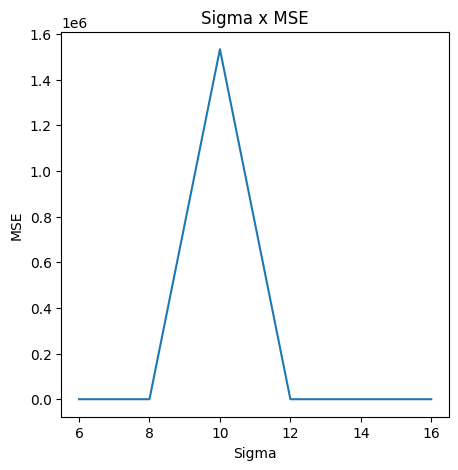

In [21]:
def ComputeMSE(Img1, Img2):
    '''
    Entrada:
    - Img1: Imagem original.
    - Img2: Imagem que se deseja analisar.

    Saída:
    - Valor de MSE.
    '''

    MSE = np.mean((Img1 - Img2) ** 2)

    return MSE

## -- Seu código começa AQUI -- ##
#Carregando a imagem com ruído
img5 = cv.imread('cameraman_ruidosa.png', cv.IMREAD_UNCHANGED)

#Filtrando as imagens com os diferentes sigmas
img5_6 = (bm3d.bm3d(img5 / 255, 6 / 255)) * 255
img5_8 = (bm3d.bm3d(img5 / 255, 8 / 255)) * 255
img5_10 = (bm3d.bm3d(img5 / 25, 10 / 255)) * 255
img5_12 = (bm3d.bm3d(img5 / 255, 12 / 255)) * 255
img5_14 = (bm3d.bm3d(img5 / 255, 14 / 255)) * 255
img5_16 = (bm3d.bm3d(img5 / 255, 16 / 255)) * 255

#Carregando a imagem original, sem ruído, para o ground truth
img6 = cv.imread('cameraman.png', cv.IMREAD_UNCHANGED)

#Calculando os valores de MSE para cada imagem
mse_6 = ComputeMSE(img6, img5_6)
mse_8 = ComputeMSE(img6, img5_8)
mse_10 = ComputeMSE(img6, img5_10)
mse_12 = ComputeMSE(img6, img5_12)
mse_14 = ComputeMSE(img6, img5_14)
mse_16 = ComputeMSE(img6, img5_16)

#Gerando o gráfico de sigma x mse
plt.figure(figsize=(5,5))
plt.plot([6, 8, 10, 12, 14, 16], [mse_6, mse_8, mse_10, mse_12, mse_14, mse_16])
plt.title('Sigma x MSE')
plt.xlabel('Sigma')
plt.ylabel('MSE')
plt.show()

## -- Seu código termina AQUI -- ##

## Comentários:

In [22]:
#Printando todos os mses
print('MSE 6: ', mse_6)
print('MSE 8: ', mse_8)
print('MSE 10: ', mse_10)
print('MSE 12: ', mse_12)
print('MSE 14: ', mse_14)
print('MSE 16: ', mse_16)

#O mais baixo é o de 12

MSE 6:  85.73055230283802
MSE 8:  50.177475672153975
MSE 10:  1532688.447271138
MSE 12:  28.564303414161134
MSE 14:  33.597862034318794
MSE 16:  39.621929091279235


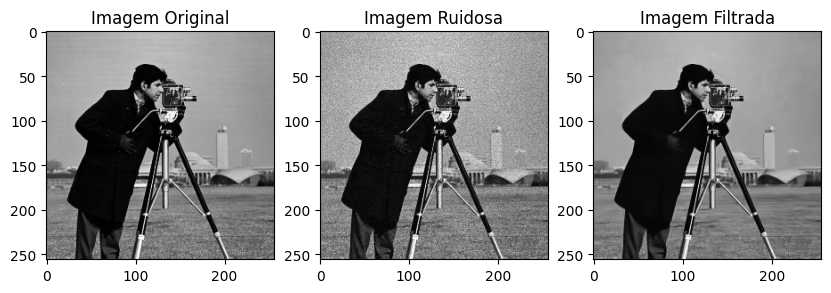

In [23]:
#Plotando a imagem original, a ruidosa e a com melhor métrica de filtro

plt.figure(figsize=(10,10))
plt.subplot(1, 3, 1)
plt.imshow(img6, cmap='gray')
plt.title('Imagem Original')
plt.subplot(1, 3, 2)
plt.imshow(img5, cmap='gray')
plt.title('Imagem Ruidosa')
plt.subplot(1, 3, 3)
plt.imshow(img5_12, cmap='gray')
plt.title('Imagem Filtrada')
plt.show()

# Comentários

### 5) Filtragem de Ruído Poisson utilizando Transformada de Anscombe (1.5/10.0)

Nesta etapa, apresentaremos uma abordagem de filtragem utilizando uma ferramenta de estabilização de variância muitas vezes aplicada para casos em que o ruído possui dependência do sinal. Para esse caso, utilizaremos a **Transformada de Anscombe**. Siga os passos abaixo:

1. Aplique sobre a imagem `cameraman_ruidosa.png` a estabilização da variância por meio da **Transformada de Anscombe**, conforme a fórmula:

   $$ fz = 2 \sqrt{Z + \frac{3}{8}} $$

   onde **fz** é a imagem no domínio de Anscombe e **Z** é a imagem ruidosa que será estabilizada.

2. Para verificar se a estabilização da variância foi bem-sucedida, estime a variância da imagem após a aplicação da Transformada de Anscombe. Para isso, utilize a seguinte função da biblioteca `skimage.restoration` já carregada no início da atividade:

   ```python
   var_est = np.mean(estimate_sigma(noisy_image, channel_axis=None))
   ```
   
   Calcule a variância média da imagem antes (**Z**) e após a Transformada de Anscombe (**fz**). Exiba esses valores e comente sobre o comportamento da variância antes e depois da transformação.

3. Após a aplicação da Transformada de Anscombe, o ruído torna-se aproximadamente independente do sinal e com variância igual a 1. Dessa forma, ao utilizarmos o **BM3D**, o parâmetro **sigma** deve ser definido como 1. Filtre a imagem no domínio de Anscombe utilizando os seguintes parâmetros sugeridos:

   ```python
   Img_filtrada_fz = (bm3d.bm3d(fz/255, 1/255)) * 255
   ```

4. Como a imagem filtrada está no domínio de Anscombe, é necessário retorná-la ao domínio original. Para isso, aplique a **Transformada Inversa de Anscombe**:

   $$ I(D) = \left( \frac{D}{2} \right)^{2} - \frac{1}{8} $$

   onde **I(D)** representa a imagem filtrada no domínio original e **D** é a imagem filtrada no domínio de Anscombe.

5. Mostre, lado a lado, as seguintes imagens:
   - A imagem original sem ruído.
   - A imagem ruidosa.
   - A imagem filtrada após a estabilização.

6. Calcule o **MSE** da imagem filtrada utilizando a Transformada de Anscombe e exiba o valor obtido. Compare esse **MSE** obtido com o da imagem filtrada com o melhor **sigma** do exercício **4.5**. **A abordagem com a Transformada de Anscombe foi mais eficaz?** Justifique sua resposta.

7. Compare visualmente a imagem filtrada obtida neste exercício com a imagem filtrada no exercício **4.5**. Comente sobre as diferenças perceptíveis entre elas.
   *   Dica: analise o desempenho da filtragem nos detalhes finos da imagem, como por exemplo a região da mão do cameraman.



26.136054224773673


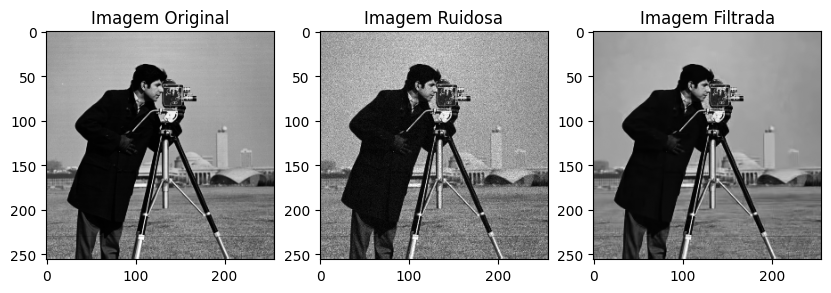

In [26]:
## -- Seu código começa AQUI -- ##
# Carregando novamente a imagem ruidosa
img7 = cv.imread('cameraman_ruidosa.png', cv.IMREAD_UNCHANGED)

# Aplicando a transformada de Anscombe
fz = 2 * np.sqrt(img7 + (3/8))

#Filtrando a imagem no dominio de anscombe
img7_filt = (bm3d.bm3d(fz/255, 1/255)) * 255

# Retornando a imagem filtrada ao dominio original
img7_filt = (img7_filt/2)**2 - (1/8)

#Plotando as imagens resultantes
plt.figure(figsize=(10,10))
plt.subplot(1, 3, 1)
plt.imshow(img6, cmap='gray')
plt.title('Imagem Original')
plt.subplot(1, 3, 2)
plt.imshow(img7, cmap='gray')
plt.title('Imagem Ruidosa')
plt.subplot(1, 3, 3)
plt.imshow(img7_filt, cmap='gray')
plt.title('Imagem Filtrada')

#Calculando o MSE da imagem filtrada utilizando a transformada de ascombe
mse_fz = ComputeMSE(img6, img7_filt)
print(mse_fz)

## -- Seu código termina AQUI -- ##

## Comentários:

# Comentário:

### 6) Restauração de imagem com borramento e movimento (2.5/10.0)

<center><img src="
https://github.com/LAVI-USP/SEL0449-SEL5895_2025/raw/refs/heads/main/imagens/pratica_07/exercicio4.png" width="750" height="430"></center>

<center><caption><b> Figura 3:</b> Modelo de degradação utilizado para a construção de "atleta_deg.tif".</b></caption></center>
<caption><center> </center></caption>

A imagem foi degradada por uma função de espalhamento de ponto e movimento construídos a partir das seguintes equações:

$$ 𝐻(𝑢,𝑣)=H_{blur}(u,v).H_{motion}(u,v) $$

$$ H_{blur}(u,v)=exp(−𝑘(𝑢^{2}+𝑣^{2})^{5/6}) $$

$$ H_{motion}(u,v) = 𝛾 . sinc(𝛼u + 𝛽v).exp(-j \pi(𝛼u + 𝛽v) ) $$

Sendo $𝑘=5.10^{−5}$, $𝛼=−6.10^{−3}$, $𝛽=4.10^{−3}$ e $𝛾=1$. A imagem foi também corrompida por ruído aditivo gaussiano com variância igual a $𝜎^{2}≅6,5$. Diante disso, siga os passos abaixo:

1. Carregue a imagem "atleta_blur.tif" degradada pela função de espalhamento acima e também matriz de degradação "H". Para carregar essa última, utilizaremos a função "loadmat" disponibilizada na biblioteca "scipy.io". Utilize as linhas de código abaixo para realizar esse procedimento:
```python
DegradBlurMotion = loadmat('H.mat')
H = DegradBlurMotion['H']
```
4. Mostre a imagem degradada e original lado a lado.
5. Aplique a transformada de Fourier na imagem degradada. Nesse momento, é importante a utilização do PADDING antes da transformada de Fourier. Para fins de padronização, utilize o padding simétrico de acordo com o código abaixo:
```python
img_pad = np.pad(img, (256, 256), 'symmetric')
imgPaddingF = np.fft.fft2(img_pad)
fshift = np.fft.fftshift(imgPaddingF)
```
6. Restaure a imagem degradada utilizando filtro de Wiener com parâmetro $𝐾=2.10^{-2}$. Abaixo, segue a fórmula do filtro:

$$ Img_{Wiener}(u,v) = I(u,v).H_{Wiener}(u,v)$$

$$ H_{Wiener}(u,v) =  \frac{1}{|H(u,v)|}. \frac{|H(u,v)|^{2}}{(|H(u,v)|^{2} + K)}       $$

em que $H(u,v)$ é a função degradação.

   *   Dica:  O módulo de um número complexo também pode ser obtido a partir da multiplicação pelo seu complexo conjugado, isto é, dado $z ∈ C$ tem-se:$$|z|^2 = z \cdot \overline{z}$$
A função ```np.conj``` retorna o conjugado de um número complexo.

7. Comente sobre as diferenças observadas após o processo de filtragem.




In [ ]:
def InsertDegMotion(img,H):
  '''
  Entrada:
    - img: Imagem de entrada.

  Saída:
    - imgNoisy: Imagem degradada.
  '''
  nRowsOri, nColsOri = img.shape
  imgPadd = np.pad(img, (256, 256), 'symmetric')
  imgF = np.fft.fft2(imgPadd)
  fshift = np.fft.fftshift(imgF)
  ImgDregF = fshift*H
  f_inverse = np.fft.ifftshift(ImgDregF)
  imgDreg = np.fft.ifft2(f_inverse)
  imgDreg = np.abs(imgDreg[255:767,255:767])
  imgDreg = imgDreg.astype('uint8')
  noise =  np.sqrt(6.5)*np.random.normal(size=(nRowsOri,nColsOri)).astype(float)
  imgDreg = imgDreg + noise
  return imgDreg

## -- Seu código começa AQUI -- ##

## -- Seu código termina AQUI -- ##

## Comentários: